 <h2> EXPLORATORY DATA ANALYSIS </h2>

In [5]:
import pandas as pd
import numpy as np

In [6]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [7]:
df = pd.read_csv(url)

In [8]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [9]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [10]:
subset = df[['engine_displacement', 'horsepower', 'model_year', 'fuel_efficiency_mpg']]

In [11]:
subset

,engine_displacement,horsepower,model_year,fuel_efficiency_mpg
0,170,159.0,2003,13.231729
1,130,97.0,2007,13.688217
2,170,78.0,2018,14.246341
3,220,NaN,2009,16.912736
4,210,140.0,2009,12.488369
...,...,...,...,...
9699,140,164.0,2013,15.101802
9700,180,154.0,2004,17.962326
9701,220,138.0,2008,17.186587
9702,230,177.0,2011,15.331551


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

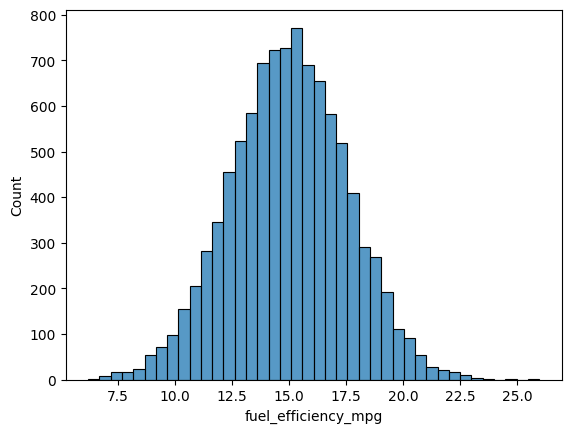

In [13]:
sns.histplot(df.fuel_efficiency_mpg, bins = 40)

In [14]:
#it is a normal distribution and has no long tail 

In [15]:
subset.isnull().sum()

engine_displacement      0
horsepower             708
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [16]:
subset.horsepower.median()

np.float64(149.0)

In [17]:
n = len(subset) 
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [18]:
n, n_val, n_test, n_train

(9704, 1940, 1940, 5824)

In [19]:
df_val = subset.iloc[:n_val]
df_test = subset.iloc[n_val: n_val + n_test]
df_train = subset.iloc[n_val+n_test:]

In [20]:
df_val, df_test, df_train 

(      engine_displacement  horsepower  model_year  fuel_efficiency_mpg
 0                     170       159.0        2003            13.231729
 1                     130        97.0        2007            13.688217
 2                     170        78.0        2018            14.246341
 3                     220         NaN        2009            16.912736
 4                     210       140.0        2009            12.488369
 ...                   ...         ...         ...                  ...
 1935                  160       129.0        2010            14.287757
 1936                  200       120.0        2023            17.291549
 1937                  190         NaN        2002            15.468923
 1938                  210       168.0        2005            14.315125
 1939                  160       127.0        2013            17.562238
 
 [1940 rows x 4 columns],
       engine_displacement  horsepower  model_year  fuel_efficiency_mpg
 1940                  210       171

In [21]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train: n_train + n_val]
df_test = df.iloc[n_train + n_test:]


In [22]:
idx = np.arange(n)

In [23]:
np.random.seed(9)
np.random.shuffle(idx) 

In [24]:
df_train = subset.iloc[idx[:n_train]]
df_val =subset.iloc[idx[n_train: n_train + n_val]]
df_test = subset.iloc[idx[n_train + n_val :]]

In [25]:
subset.iloc[:10]

,engine_displacement,horsepower,model_year,fuel_efficiency_mpg
0,170,159.0,2003,13.231729
1,130,97.0,2007,13.688217
2,170,78.0,2018,14.246341
3,220,NaN,2009,16.912736
4,210,140.0,2009,12.488369
5,190,NaN,2008,17.271818
6,240,127.0,2012,13.210412
7,150,239.0,2020,12.848884
8,250,174.0,2016,16.823554
9,150,123.0,2005,12.298355


In [26]:
subset.iloc[idx[:10]]

,engine_displacement,horsepower,model_year,fuel_efficiency_mpg
9066,240,136.0,2006,10.304700
3073,190,141.0,2017,13.479434
2476,200,184.0,2017,16.190653
658,200,NaN,2022,15.446503
954,250,132.0,2001,14.472172
8441,200,128.0,2006,17.599654
8307,190,128.0,2023,14.492826
6788,130,178.0,2010,12.915926
8988,120,157.0,2006,15.210608
7457,190,169.0,2017,14.700074


In [27]:
df_train.head()

,engine_displacement,horsepower,model_year,fuel_efficiency_mpg
9066,240,136.0,2006,10.304700
3073,190,141.0,2017,13.479434
2476,200,184.0,2017,16.190653
658,200,NaN,2022,15.446503
954,250,132.0,2001,14.472172


In [28]:
len(df_train),len(df_val), len(df_test), n

(5824, 1940, 1940, 9704)

In [29]:
df_train

,engine_displacement,horsepower,model_year,fuel_efficiency_mpg
9066,240,136.0,2006,10.304700
3073,190,141.0,2017,13.479434
2476,200,184.0,2017,16.190653
658,200,NaN,2022,15.446503
954,250,132.0,2001,14.472172
...,...,...,...,...
351,260,161.0,2021,14.769735
9170,140,NaN,2016,10.363254
305,210,158.0,2015,10.592435
7888,140,166.0,2008,17.119261


In [30]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
df_train

,engine_displacement,horsepower,model_year,fuel_efficiency_mpg
0,240,136.0,2006,10.304700
1,190,141.0,2017,13.479434
2,200,184.0,2017,16.190653
3,200,NaN,2022,15.446503
4,250,132.0,2001,14.472172
...,...,...,...,...
5819,260,161.0,2021,14.769735
5820,140,NaN,2016,10.363254
5821,210,158.0,2015,10.592435
5822,140,166.0,2008,17.119261


In [32]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [33]:
subset.horsepower.median()

np.float64(149.0)

In [34]:
X_train = subset.values

In [35]:
X_train = subset.fillna(0).values

In [37]:
del df_train.fuel_efficiency_mpg
del df_val.fuel_efficiency_mpg
del df_test.fuel_efficiency_mpg

AttributeError: 'DataFrame' object has no attribute 'fuel_efficiency_mpg'

In [38]:
subset

,engine_displacement,horsepower,model_year,fuel_efficiency_mpg
0,170,159.0,2003,13.231729
1,130,97.0,2007,13.688217
2,170,78.0,2018,14.246341
3,220,NaN,2009,16.912736
4,210,140.0,2009,12.488369
...,...,...,...,...
9699,140,164.0,2013,15.101802
9700,180,154.0,2004,17.962326
9701,220,138.0,2008,17.186587
9702,230,177.0,2011,15.331551


In [39]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [40]:
subset

,engine_displacement,horsepower,model_year,fuel_efficiency_mpg
0,170,159.0,2003,13.231729
1,130,97.0,2007,13.688217
2,170,78.0,2018,14.246341
3,220,NaN,2009,16.912736
4,210,140.0,2009,12.488369
...,...,...,...,...
9699,140,164.0,2013,15.101802
9700,180,154.0,2004,17.962326
9701,220,138.0,2008,17.186587
9702,230,177.0,2011,15.331551


In [41]:
subset

,engine_displacement,horsepower,model_year,fuel_efficiency_mpg
0,170,159.0,2003,13.231729
1,130,97.0,2007,13.688217
2,170,78.0,2018,14.246341
3,220,NaN,2009,16.912736
4,210,140.0,2009,12.488369
...,...,...,...,...
9699,140,164.0,2013,15.101802
9700,180,154.0,2004,17.962326
9701,220,138.0,2008,17.186587
9702,230,177.0,2011,15.331551


In [42]:
len(y_train)

5824

In [43]:
df_train

,engine_displacement,horsepower,model_year
0,240,136.0,2006
1,190,141.0,2017
2,200,184.0,2017
3,200,NaN,2022
4,250,132.0,2001
...,...,...,...
5819,260,161.0,2021
5820,140,NaN,2016
5821,210,158.0,2015
5822,140,166.0,2008


In [44]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [510]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [511]:
X = np.column_stack([ones, X])

In [46]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]


In [47]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [48]:

w0 = w_full[0]
w = w_full[1:]

In [49]:

w0, w

(np.float64(26.08419497680291), array([286.12285934,   3.93813107]))

In [50]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [51]:
train_linear_regression(X, y)

(np.float64(25844.754055766833),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [52]:
subset.columns

Index(['engine_displacement', 'horsepower', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

In [53]:
base = ['engine_displacement', 'horsepower', 'model_year']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [54]:
w0

np.float64(1.9351992149718265)

In [55]:
w

array([-3.19690035e-05,  2.56662568e-04,  3.95819463e-04])

<Axes: ylabel='Count'>

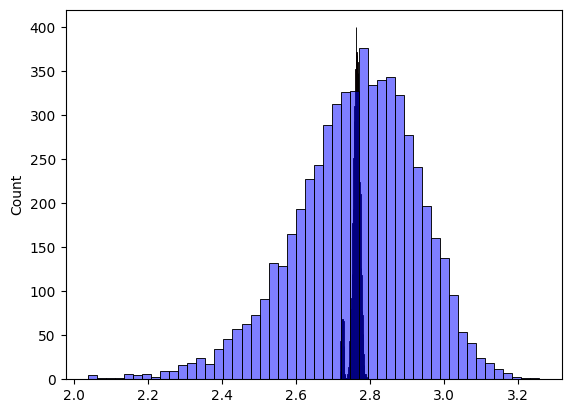

In [56]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [57]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [58]:

rmse(y_train, y_pred).round(2)

np.float64(0.17)

In [59]:
base = ['engine_displacement', 'horsepower', 'model_year']
X_train = df_train[base].fillna(df['horsepower'].mean()).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

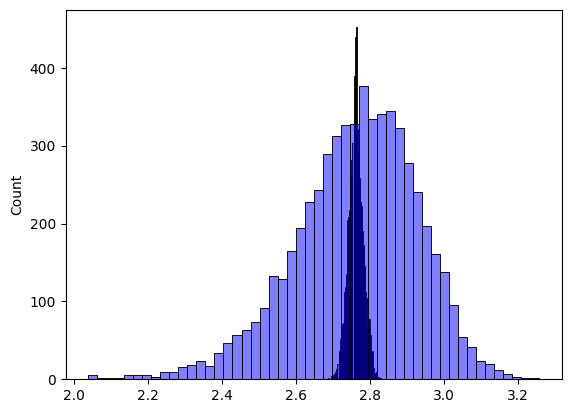

In [60]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [61]:
w

array([-2.20227755e-05,  6.77090951e-04,  3.55064803e-04])

In [62]:
w0

np.float64(1.9494054148664324)

In [63]:
base = ['engine_displacement', 'horsepower', 'model_year']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w) 

In [64]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [65]:

rmse(y_train, y_pred).round(2)

np.float64(0.17)

In [66]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [67]:
y= [1, 2, 3, 1, 2, 3]

In [68]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [69]:
XTX_inv = np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [70]:
XTX_inv

array([[ 2.35803616e-06, -1.46900642e-05,  8.00007928e-09],
       [-1.46900642e-05,  2.94487947e-04, -3.84130606e-06],
       [ 8.00007928e-09, -3.84130606e-06,  2.28083884e-07]])

In [71]:

XTX = XTX + 0.01 * np.eye(3)

In [72]:
np.linalg.inv(XTX)


array([[ 3.85624712e-02, -1.98159300e-02, -1.98158861e-02],
       [-1.98159300e-02,  5.00124975e+01, -4.99875026e+01],
       [-1.98158861e-02, -4.99875026e+01,  5.00124974e+01]])

In [73]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [74]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)


NameError: name 'prepare_X' is not defined

In [76]:
y_pred

array([2.75644661, 2.76368238, 2.77439918, ..., 2.76661463, 2.76813502,
       2.76412028], shape=(5824,))

In [77]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [78]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.162447198062829)

In [79]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.16247790756428337)

In [80]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.162447198062829)

In [81]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=1)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.16275479664894102)

In [82]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=10)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.1627789340860531)

In [87]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.16245046108816816)

In [89]:
np.std(0.16245).round(3)

np.float64(0.0)